# ***  Capstone Project for Module20: Initial Report and EDA ***

## ***Project 17.1 Template :***

###**1. Research Question : How accurately can we predict whether a user will make a purchase on an E-commerce website based on their browsing behavior, product interactions, and demographic information?** ###

###**2. Data Description and Structures:**

###**3.Data Source:**

    a) https://www.kaggle.com/datasets/kzmontage/e-commerce-website-logsLinks to an external site.
    b) The dataset contains user interactions on an e-commerce website, including details about page views, product views, purchases, and user demographics.

###**4.Data Structure:**
        
    a) Features include user interactions, timestamps, product details, user demographics, and other relevant attributes.
    b) The target variable is binary: "Purchase" or "No Purchase" indicating whether the user made a purchase during the session.

###**3. Techniques and Results:**

    a) Techniques : 
        . EDA (Explore Data ), 
        . Data Preprocessing ( Handle missing values, encode categorical variables, and scale numerical features) , 
        . Feature  Engineering (Extract Relevant  Variables), 
        . Model training (KNN,SVM,LogisticRegression and DecisionTree), 
        . Hyper Parameter Training (Model Optimization) , 
        . Evaluation Metrics (  precision, recall, F1 score, AUC-ROC)  and Comparison (select best model for the research question)
        
    b) Results : 
        . Search Predictive Model to classifies users into "Purchase" or "No Purchase" categories,  
        . Identify key features influencing purchase decisions  and 
        . Enhance marketing Strategies and Improve overall conversion rate on the website.

###**4. Why this research is important: **

    a) Predicting of User behavior allows e-commerce businesses to optimize marketing efforts, personalize user experiences, and increase conversion rates.
    b) Understanding customer on their  purchase decision factors helps businesses  tailor their strategies, recommend relevant products, and create a more engaging online shopping experience.

### Step 1: Read in the Data

Use pandas to read in the dataset `E-comerce Website Logs.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_csv('data/E-commerce Website Logs.csv', sep = ',', low_memory = False)

### Step 2: Exploratory Data Analysis, Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the DataFrame
df.head()

In [ ]:
# Info about the DataFrame, including data types and non-null counts
df.info()

### Step 3: Remove missing values, redundancy and irrelevant information from the analysis
Given the 'age' with lots of missing values, redundancies {"accessed_date and durations_(secs)" , "network_protocol and ip", "country and language", "returned and returned_amount" } and irrelevant (accessed_from, age) 
these columns [ age, accessed_date, network_protocol, country, accessed_from, membership]  can be removed 

In [5]:
# Remove rows where age column has missing values 
df.dropna(subset=['age'], inplace= True)

In [6]:
# For analysis first cut, remove these columns from the data frame
columns_to_remove = ['age', 'accessed_date', 'network_protocol', 'ip', 'language', 'accessed_Ffom', 'returned','country']
df_cleaned = df.drop(columns = columns_to_remove)

In [7]:
# Summary of the cleaned data frame 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration_(secs)  99457 non-null  int64  
 1   bytes            99457 non-null  int64  
 2   gender           99457 non-null  object 
 3   membership       99457 non-null  object 
 4   sales            99457 non-null  float64
 5   returned_amount  99457 non-null  float64
 6   pay_method       99457 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 6.1+ MB


In [8]:
# Explore unique values in categorical columns
print("Unique values in 'gender':", df_cleaned['gender'].unique())
print("Unique values in 'pay_method':", df_cleaned['pay_method'].unique())
print("unique values in 'membership':", df_cleaned['membership'].unique())

Unique values in 'gender': ['Female' 'Male' 'Unknown']
Unique values in 'pay_method': ['Credit Card' 'Debit Card' 'Cash' 'Others']
unique values in 'membership': ['Normal' 'Premium' 'Not Logged In']


### Step 4 : Encode categorical (gender, language, membership, pay_method) with one-hot; duration_hour, and kbytes

In [9]:
mydf = pd.get_dummies(df_cleaned, columns=['gender','membership', 'pay_method'], drop_first=True)

In [10]:
# convert duration_secs to duration_hour, bytes to kbytes,  for readability 
mydf['duration_(hour)'] = (mydf['duration_(secs)']/3600).round(2)
mydf.drop('duration_(secs)', axis=1, inplace=True)
mydf['kbytes'] = ((mydf['bytes']/1000).round(0)).astype(int)
mydf.drop('bytes', axis = 1, inplace=True)
mydf['sales'] = (mydf['sales'].round(0)).astype(int)

In [11]:
mydf.head()

,sales,returned_amount,gender_Male,gender_Unknown,membership_Not Logged In,membership_Premium,pay_method_Credit Card,pay_method_Debit Card,pay_method_Others,duration_(hour),kbytes
0,262,0.0,False,False,False,False,True,False,False,0.70,20
1,732,0.0,True,False,False,False,False,True,False,1.12,20
2,15,0.0,True,False,False,False,False,False,False,0.42,90
3,958,0.0,False,False,False,False,True,False,False,1.27,100
4,22,0.0,False,False,False,False,False,False,False,1.01,270


In [12]:
# Summary statistics of numeric columns
mydf.describe()

,sales,returned_amount,duration_(hour),kbytes
count,99457.000000,99457.000000,99457.00000,99457.000000
mean,360.247685,72.080813,0.90316,1.445298
std,736.011943,361.073570,0.28109,7.484776
min,0.000000,0.000000,0.42000,0.000000
25%,0.000000,0.000000,0.66000,0.000000
50%,41.000000,0.000000,0.90000,1.000000
75%,245.000000,0.000000,1.15000,2.000000
max,11200.000000,7999.980000,1.39000,898.000000


In [13]:
# Standardize the numeric columns 
import seaborn as sns
import matplotlib.pyplot as plt

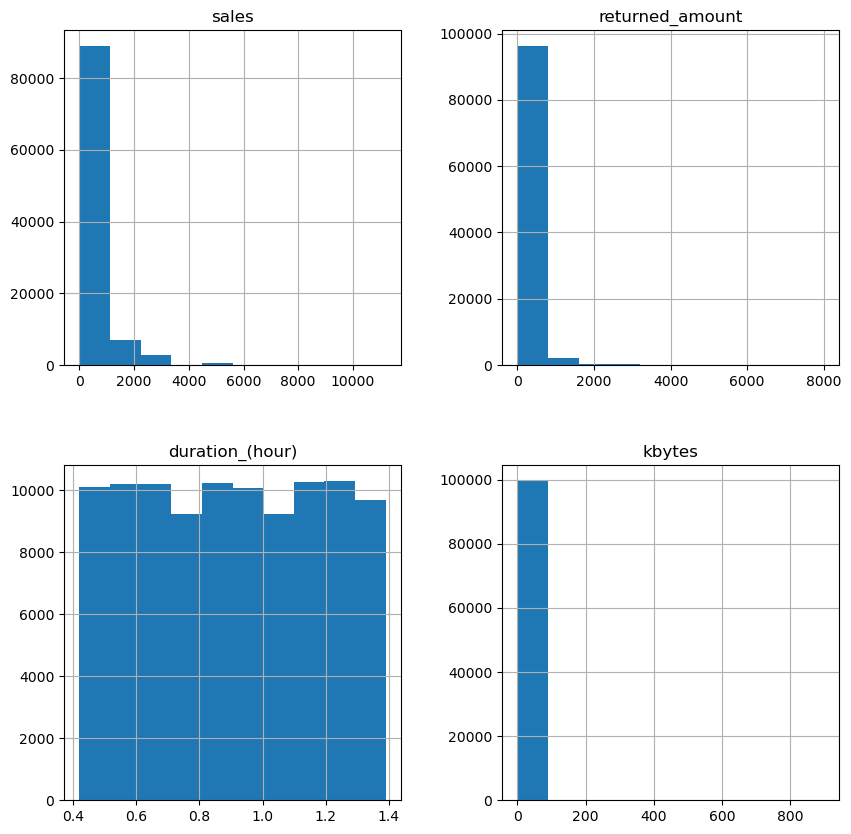

In [14]:
# Plot histograms for numeric columns
mydf.hist(figsize=(10, 10))
plt.show()

<Axes: >

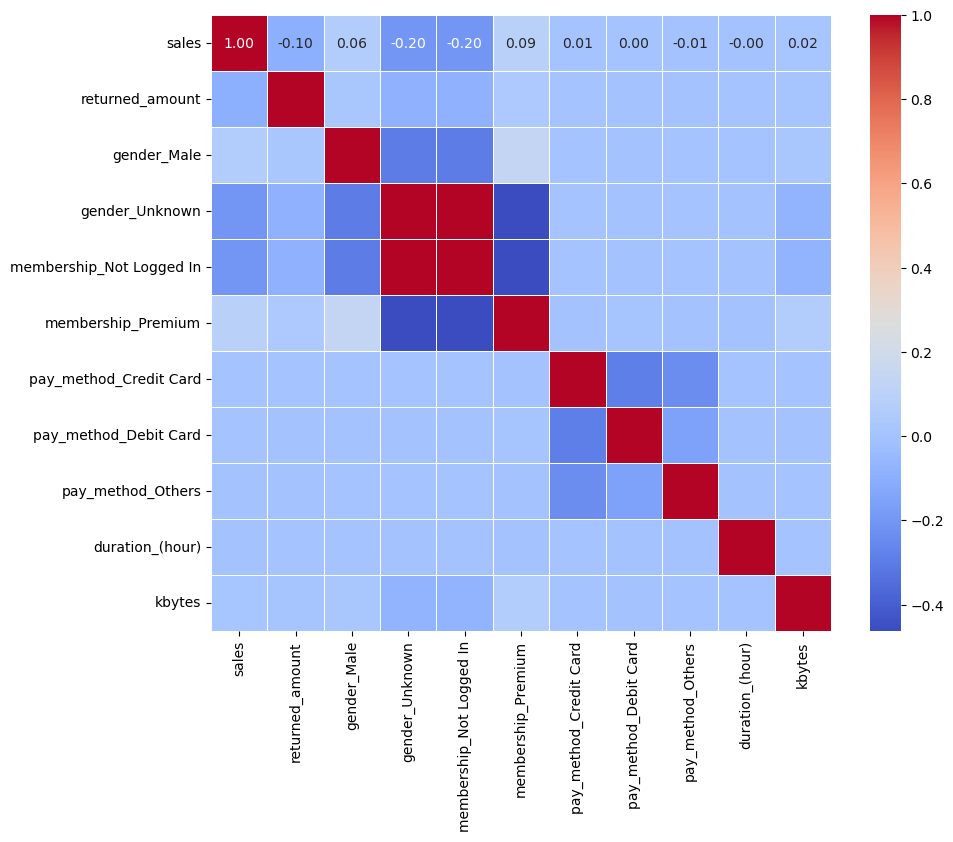

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(mydf.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt =".2f", annot_kws={"size":10})

### Step 5: Feature and Taget Variables Engineering
1. Target Variable (y): 
Create a binary target variable , indicating whether a purchase was made during the session, by checking if the 'sale' column is greater than zero. 
2. Feature Variable(X):
Create relevant features,  capturing user interaction, timestamps, product details, and user demographics, by using numeric, encoded columns 
and interaction terms between 'duration_hour' and 'kbytes' 

In [17]:
# Target Variable
mydf['purchase_made'] = (df['sales'] > 0).astype(int)

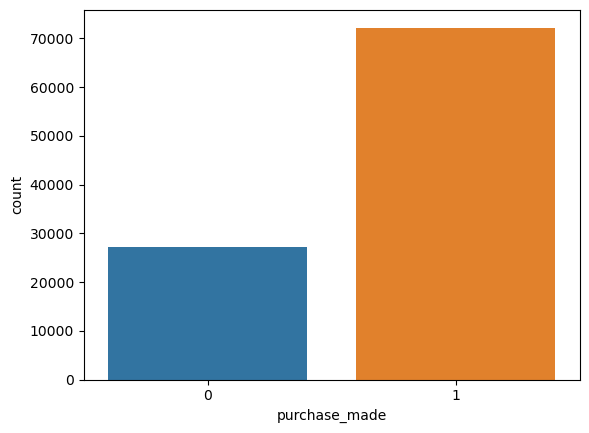

In [18]:
# Visual inspection of the target variable 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(x='purchase_made', data = mydf)
plt.show()

In [19]:
# Identify features (X) 
# Drop the y column to focus on the binary classification task

mydf.drop(columns= 'sales', inplace=True)
X = mydf.drop('purchase_made', axis=1)  
y = mydf['purchase_made'] 

In [20]:
# Assuming X, y are your features and target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: A Baseline Model
Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Initialize and fit a DummyClassifier

In [21]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [22]:
# Make predictions on the test set
y_pred = dummy_classifier.predict(X_test)
y_probabilities = dummy_classifier.predict_proba(X_test)[:,1]

# Calculate baseline performance metric
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred,zero_division=1)
baseline_recall = recall_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred)
baseline_roc_auc = roc_auc_score(y_test, y_probabilities)

In [23]:
# Print base line matrix 
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")
print(f"Baseline F1 Score: {baseline_f1:.4f}")
print(f"Baseline ROC-AUC Score: {baseline_roc_auc:.4f}")

Baseline Accuracy: 0.7290
Baseline Precision: 0.7290
Baseline Recall: 1.0000
Baseline F1 Score: 0.8433
Baseline ROC-AUC Score: 0.5000


### Compare the baseline to a default Logistic Model "blgr"
Use basic Logistic Regression to build "blgr" .  

In [24]:
# Use Logistic Regression basic model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

blgr = LogisticRegression()
blgr.fit(X_train_scaled, y_train)
y_pred = blgr.predict(X_test_scaled)
y_probabilities = blgr.predict_proba(X_test_scaled)[:,1]

# Calculate baseline performance metrics
blgr_accuracy = accuracy_score(y_test, y_pred)
blgr_precision = precision_score(y_test, y_pred,zero_division=1)
blgr_recall = recall_score(y_test, y_pred)
blgr_f1 = f1_score(y_test, y_pred)
blgr_roc_auc = roc_auc_score(y_test, y_probabilities)

In [25]:
# Print performance metrics
print(f"blgr_Accuracy: {blgr_accuracy:.4f}")
print(f"blgr_Precision: {blgr_precision:.4f}")
print(f"blgr_Recall: {blgr_recall:.4f}")
print(f"blgr_F1 Score: {blgr_f1:.4f}")
print(f"blgr_ROC-AUC Score: {blgr_roc_auc:.4f}")

blgr_Accuracy: 0.9247
blgr_Precision: 0.9064
blgr_Recall: 1.0000
blgr_F1 Score: 0.9509
blgr_ROC-AUC Score: 0.9942


### 4 Model Comparisions using performance metric (Classifier , Accuracy, Precision, Recall, F1,AUC-ROC, Fit Time )

In [26]:
import time
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression


# Start metrics table with LogisticRegression using StratifiedKFold

# Summary table columns
summary_columns = ['Classifier','Accuracy', 'Precision', 'Recall', 'F1', 'AUC_ROC', 'Fit Time']

summary_df_list = []

model_lr = LogisticRegression()

# Function to measure Fit Time
def fit_with_time(model, X, y):
    start_time = time.time()
    model.fit(X,y)
    return time.time() -start_time
    
# Perform  cross-validation
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Get the results and append them to the summary DataFrame
lgr_results = {
        'Classifier': 'Logistic',
        'Accuracy': cross_val_score(model_lr, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean(),
        'Precision': cross_val_score(model_lr, X_train_scaled, y_train, cv=cv, scoring='precision').mean(),
        'Recall': cross_val_score(model_lr,X_train_scaled, y_train, cv=cv, scoring = 'recall').mean(),
        'F1': cross_val_score(model_lr,X_train_scaled, y_train,cv=cv, scoring = 'f1').mean(),
        'AUC-ROC': cross_val_score(model_lr,X_train_scaled, y_train, cv=cv, scoring ='roc_auc').mean(),
        'Fit Time': cross_val_score(model_lr, X_train_scaled, y_train, cv=cv, scoring = fit_with_time).mean()
    }
    
summary_df_list.append(pd.DataFrame([lgr_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

  Classifier  Accuracy  Precision  Recall        F1   AUC-ROC  Fit Time
0   Logistic  0.921737   0.902634     1.0  0.948825  0.981443  0.086327


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

# Get the results and append them to the summary DataFrame
knn_results = {
        'Classifier': 'KNN',
        'Accuracy': cross_val_score(model_knn, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean(),
        'Precision': cross_val_score(model_knn, X_train_scaled, y_train, cv=cv, scoring='precision').mean(),
        'Recall': cross_val_score(model_knn,X_train_scaled, y_train, cv=cv, scoring = 'recall').mean(),
        'F1': cross_val_score(model_knn,X_train_scaled, y_train,cv=cv, scoring = 'f1').mean(),
        'AUC-ROC': cross_val_score(model_knn,X_train_scaled, y_train, cv=cv, scoring ='roc_auc').mean(),
        'Fit Time': cross_val_score(model_knn, X_train_scaled, y_train, cv=cv, scoring = fit_with_time).mean()
    }
    
summary_df_list.append(pd.DataFrame([knn_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

  Classifier  Accuracy  Precision    Recall        F1   AUC-ROC  Fit Time
0   Logistic  0.921737   0.902634  1.000000  0.948825  0.981443  0.086327
1        KNN  0.951298   0.937226  0.999844  0.967522  0.954744  0.024237


In [28]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()

# Get the results and append them to the summary DataFrame
dt_results = {
        'Classifier': 'Decision Tree',
        'Accuracy': cross_val_score(model_dt, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean(),
        'Precision': cross_val_score(model_dt, X_train_scaled, y_train, cv=cv, scoring='precision').mean(),
        'Recall': cross_val_score(model_dt,X_train_scaled, y_train, cv=cv, scoring = 'recall').mean(),
        'F1': cross_val_score(model_dt,X_train_scaled, y_train,cv=cv, scoring = 'f1').mean(),
        'AUC-ROC': cross_val_score(model_dt,X_train_scaled, y_train, cv=cv, scoring ='roc_auc').mean(),
        'Fit Time': cross_val_score(model_dt, X_train_scaled, y_train, cv=cv, scoring = fit_with_time).mean()
    }
    
summary_df_list.append(pd.DataFrame([dt_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

      Classifier  Accuracy  Precision    Recall        F1   AUC-ROC  Fit Time
0       Logistic  0.921737   0.902634  1.000000  0.948825  0.981443  0.086327
1            KNN  0.951298   0.937226  0.999844  0.967522  0.954744  0.024237
2  Decision Tree  0.998567   0.998322  0.999706  0.999013  0.997681  0.028433


In [29]:
from sklearn.svm import SVC
model_svc = SVC()

# Get the results and append them to the summary DataFrame
svc_results = {
        'Classifier': 'SVC',
        'Accuracy': cross_val_score(model_svc, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean(),
        'Precision': cross_val_score(model_svc, X_train_scaled, y_train, cv=cv, scoring='precision').mean(),
        'Recall': cross_val_score(model_svc,X_train_scaled, y_train, cv=cv, scoring = 'recall').mean(),
        'F1': cross_val_score(model_svc,X_train_scaled, y_train,cv=cv, scoring = 'f1').mean(),
        'AUC-ROC': cross_val_score(model_svc,X_train_scaled, y_train, cv=cv, scoring ='roc_auc').mean(),
        'Fit Time': cross_val_score(model_svc, X_train_scaled, y_train, cv=cv, scoring = fit_with_time).mean()
    }
    
summary_df_list.append(pd.DataFrame([svc_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

      Classifier  Accuracy  Precision    Recall        F1   AUC-ROC   Fit Time
0       Logistic  0.921737   0.902634  1.000000  0.948825  0.981443   0.086327
1            KNN  0.951298   0.937226  0.999844  0.967522  0.954744   0.024237
2  Decision Tree  0.998567   0.998322  0.999706  0.999013  0.997681   0.028433
3            SVC  0.924175   0.905381  1.000000  0.950340  0.997796  23.046797


# Purchase_made is imbalanced as shown below...

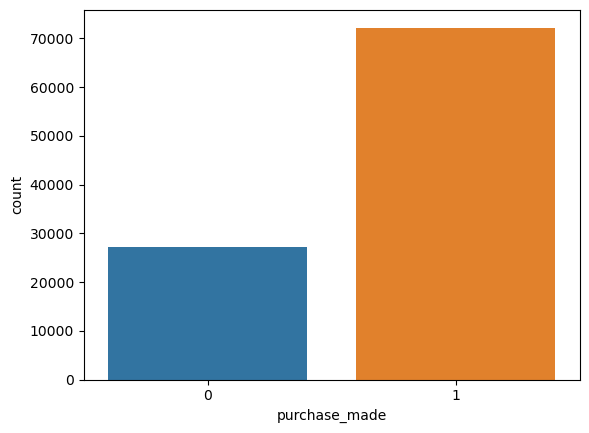

In [18]:
# Visual inspection of the target variable 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(x='purchase_made', data = mydf)
plt.show()

# The below summary of performance metrics associated with 4 models should be based on F1, AUC-ROC.
The best model is Decision Tree with overall best performance score across all categories.

In [31]:
print(summary_df)

      Classifier  Accuracy  Precision    Recall        F1   AUC-ROC   Fit Time
0       Logistic  0.921737   0.902634  1.000000  0.948825  0.981443   0.086327
1            KNN  0.951298   0.937226  0.999844  0.967522  0.954744   0.024237
2  Decision Tree  0.998567   0.998322  0.999706  0.999013  0.997681   0.028433
3            SVC  0.924175   0.905381  1.000000  0.950340  0.997796  23.046797


# Feature Importance from each model to see if common important features can be applicable to all classifiers

In [ ]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_feature_importance = logreg_model.coef_[0]

# Model 2: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
# Feature importance is not directly available for KNN, so we can use feature importance by permutation
from sklearn.inspection import permutation_importance
knn_perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=30, random_state=42)
knn_feature_importance = knn_perm_importance.importances_mean

# Model 3: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_feature_importance = dt_model.feature_importances_

# Model 4: Support Vector Classifier (SVC)
svc_model = SVC(probability=True)
svc_model.fit(X_train_scaled, y_train)
# Feature importance is not directly available for SVC, so we can use feature importance by permutation
svc_perm_importance = permutation_importance(svc_model, X_test_scaled, y_test, n_repeats=30, random_state=42)
svc_feature_importance = svc_perm_importance.importances_mean

# Create DataFrames for visualization
logreg_df = pd.DataFrame({'Feature': X.columns, 'Importance': logreg_feature_importance})
knn_df = pd.DataFrame({'Feature': X.columns, 'Importance': knn_feature_importance})
dt_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_importance})
svc_df = pd.DataFrame({'Feature': X.columns, 'Importance': svc_feature_importance})

# Plot feature importance for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Importance', y='Feature', data=logreg_df.sort_values(by='Importance', ascending=False))
plt.title('Logistic Regression Feature Importance')

plt.subplot(2, 2, 2)
sns.barplot(x='Importance', y='Feature', data=knn_df.sort_values(by='Importance', ascending=False))
plt.title('K-Nearest Neighbors Feature Importance')

plt.subplot(2, 2, 3)
sns.barplot(x='Importance', y='Feature', data=dt_df.sort_values(by='Importance', ascending=False))
plt.title('Decision Tree Feature Importance')

plt.subplot(2, 2, 4)
sns.barplot(x='Importance', y='Feature', data=svc_df.sort_values(by='Importance', ascending=False))
plt.title('Support Vector Classifier Feature Importance')

plt.tight_layout()
plt.show()

# Next Steps 

1. Optimization of model with reduced dimension of features and GridSearchCV with scanning parameters appropriate to the selected model
2. Identify the important features from code immediate above this markdown cell 